In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
%matplotlib inline

In [4]:
iris_df = pd.read_csv("Iris.csv")

In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [7]:
iris_df.shape

(150, 6)

In [8]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris = iris_df.groupby('Species',as_index= False)["Id"].count()
iris

,Species,Id
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


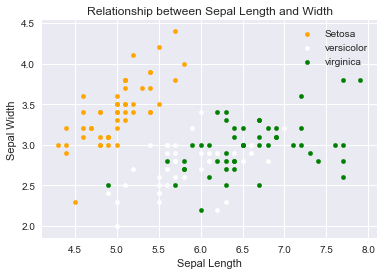

In [11]:
ax = iris_df[iris_df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris_df[iris_df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='white', label='versicolor',ax=ax)
iris_df[iris_df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Relationship between Sepal Length and Width")

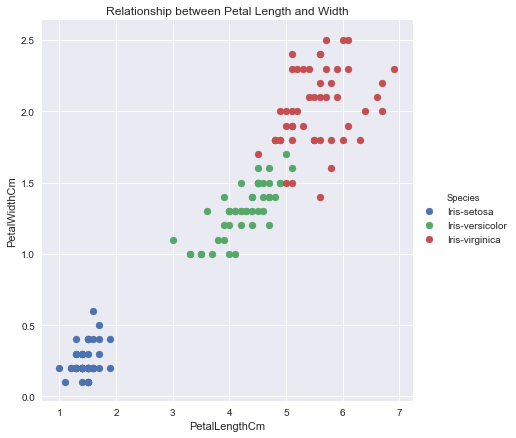

In [12]:
sns.FacetGrid(iris_df, hue="Species", size=6) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.title("Relationship between Petal Length and Width")

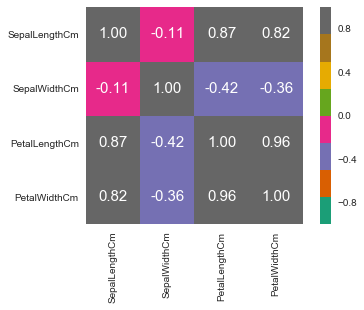

In [13]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
corr_matrix = iris_df[cols].corr()
heatmap = sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

In [14]:
petal = np.array(iris_df[["PetalLengthCm","PetalWidthCm"]])
sepal = np.array(iris_df[["SepalLengthCm","SepalWidthCm"]])

key = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
Y = iris_df['Species'].map(key)

In [15]:
from sklearn.cross_validation import train_test_split

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(sepal,Y,test_size=0.2,random_state=42)

X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(petal,Y,test_size=0.2,random_state=42)

C:\Users\yj\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
#Standardizing and Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_S)
X_train_std_S = scaler.transform(X_train_S)
X_test_std_S = scaler.transform(X_test_S)

scaler.fit(X_train_P)
X_train_std_P = scaler.transform(X_train_P)
X_test_std_P = scaler.transform(X_test_P)


print('Standardized features for Sepal and Petal \n')
print("Sepal\n\n" +str(X_train_std_S[:2]))
print("\nPetal\n\n" +str(X_train_std_P[:2]))

Standardized features for Sepal and Petal 

Sepal

[[-1.47393679  1.22037928]
 [-0.13307079  3.02001693]]

Petal

[[-1.5639872  -1.30948358]
 [-1.27728011 -1.04292204]]


In [21]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=4,presort=True)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.8083333333333333
Testing  Accuracy Sepal = 0.8333333333333334

Training Accuracy Petal = 0.975
Testing  Accuracy Petal = 1.0


In [18]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.7666666666666667
Testing  Accuracy Sepal = 0.9333333333333333

Training Accuracy Petal = 0.9333333333333333
Testing  Accuracy Petal = 0.9666666666666667


In [ ]:
#k- Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

In [19]:
#Ensemble Learning: Random Forests ( n Decision trees)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.7833333333333333
Testing  Accuracy Sepal = 0.9

Training Accuracy Petal = 0.95
Testing  Accuracy Petal = 1.0


In [20]:
#Support Vector Machines
from sklearn.svm import LinearSVC

model = LinearSVC(C=10)
model.fit(X_train_std_S,y_train_S)
print('Training Accuracy Sepal = {}'.format(model.score(X_train_std_S, y_train_S)))
print('Testing  Accuracy Sepal = {}'.format(model.score(X_test_std_S, y_test_S)))

model.fit(X_train_std_P,y_train_P)
print('\nTraining Accuracy Petal = {}'.format(model.score(X_train_std_P, y_train_P)))
print('Testing  Accuracy Petal = {}'.format(model.score(X_test_std_P, y_test_P)))

Training Accuracy Sepal = 0.775
Testing  Accuracy Sepal = 0.9333333333333333

Training Accuracy Petal = 0.95
Testing  Accuracy Petal = 1.0
